:::{.callout-note}
Last update: 3 Jan 2024  
This page is a test post. The Jupyter notebook is a rough draft. This post is for testing only. Grammar and spelling checks have not been done.
:::

# Chua’s circuit

ToDo:  

- fix folder and make LTSpice file  
- fix this write up  
- get research materials  

Sections  

- Abstract  
- Intro  
  - what is a Chua's circuit?




In [2]:
import numpy as np
from sympy import *
from scipy import signal
import matplotlib.pyplot as plt
init_printing()

## Circuit with elements only



![schematic](Chua's-circuit.png)


~~~
R2 0 2 1
R1 1 2 1.6e3
C2 0 2 4.7e-9
C1 0 1 47e-9
L1 0 1 8.5e-3


[[Eq(-I_L1 + v1*(C1*s + 1/R1) - v2/R1, 0)],
[Eq(v2*(C2*s + 1/R2 + 1/R1) - v1/R1, 0)],
[Eq(-v1, 0)]]

str(equ.free_symbols)
'{v2, R1, I_L1, C1, v1, C2, s, R2}'
str(X)
'[v1, v2, I_L1]'

~~~



In [5]:
# declare the following symbols
v2, R1, I_L1, C1, v1, C2, s, R2 = symbols('v2 R1 I_L1 C1 v1 C2 s R2')

# use the equations generated by nodal analysis
equ_p1 = Matrix(
    [[Eq(-I_L1 + v1*(C1*s + 1/R1) - v2/R1, 0)],
    [Eq(v2*(C2*s + 1/R2 + 1/R1) - v1/R1, 0)]])
equ_p1

⎡           ⎛       1 ⎞   v₂    ⎤
⎢-I_L1 + v₁⋅⎜C₁⋅s + ──⎟ - ── = 0⎥
⎢           ⎝       R₁⎠   R₁    ⎥
⎢                               ⎥
⎢    ⎛       1    1 ⎞   v₁      ⎥
⎢ v₂⋅⎜C₂⋅s + ── + ──⎟ - ── = 0  ⎥
⎣    ⎝       R₂   R₁⎠   R₁      ⎦

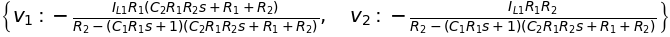

In [6]:
# find symbolic solution
u = solve(equ_p1,[v1, v2, I_L1])
u

## Circuit with voltage source

![schematic](sch_Chua’s_circuit_w_source.png)

https://easyeda.com/editor#mode=sim,id=|6b1460bfe8ec4872b7d7fd3038f38331|82658727399e487c94ebe177746e0ba0|ea67be55cc5c49f288edfa4ed837b1f0|8ea3b89798114238a453a1c678008c07



~~~
V1 3 0 1
L1 0 1 8.5e-3
C1 0 1 47e-9
C2 0 2 4.7e-9
R1 1 2 1.6e3
R2 3 2 1


str(equ)
'Matrix(
[[Eq(-I_L1 + v1*(C1*s + 1/R1) - v2/R1, 0)],
[Eq(v2*(C2*s + 1/R2 + 1/R1) - v3/R2 - v1/R1, 0)],
[Eq(I_V1 - v2/R2 + v3/R2, 0)],
[Eq(v3, V1)],
[Eq(-I_L1*L1*s - v1, 0)]]

)'
str(equ.free_symbols)
'{I_V1, V1, s, v2, R1, I_L1, v3, v1, C1, L1, C2, R2}'
str(X)
'[v1, v2, v3, I_V1, I_L1]'




str(equ.free_symbols)
'{I_V1, V1, s, v2, R1, I_L1, v3, v1, C1, L1, C2, R2}'
str(X)
'[v1, v2, v3, I_L1, I_V1]'

~~~

In [6]:
# declare the following symbols
I_V1, V1, s, v2, R1, I_L1, v3, v1, C1, L1, C2, R2 = symbols('I_V1 V1 s v2 R1 I_L1 v3 v1 C1 L1 C2 R2')

# use the equations generated by nodal analysis
equ_p1 = Matrix(
    [[Eq(-I_L1 + v1*(C1*s + 1/R1) - v2/R1, 0)],
    [Eq(v2*(C2*s + 1/R2 + 1/R1) - v3/R2 - v1/R1, 0)],
    [Eq(I_V1 - v2/R2 + v3/R2, 0)],
    [Eq(v3, V1)],
    [Eq(-I_L1*L1*s - v1, 0)]])
equ_p1

⎡            ⎛       1 ⎞   v₂     ⎤
⎢ -I_L1 + v₁⋅⎜C₁⋅s + ──⎟ - ── = 0 ⎥
⎢            ⎝       R₁⎠   R₁     ⎥
⎢                                 ⎥
⎢   ⎛       1    1 ⎞   v₃   v₁    ⎥
⎢v₂⋅⎜C₂⋅s + ── + ──⎟ - ── - ── = 0⎥
⎢   ⎝       R₂   R₁⎠   R₂   R₁    ⎥
⎢                                 ⎥
⎢              v₂   v₃            ⎥
⎢       I_V1 - ── + ── = 0        ⎥
⎢              R₂   R₂            ⎥
⎢                                 ⎥
⎢             v₃ = V₁             ⎥
⎢                                 ⎥
⎣       -I_L1⋅L₁⋅s - v₁ = 0       ⎦

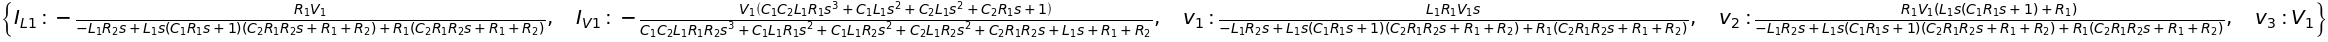

In [7]:
# find symbolic solution
u = solve(equ_p1,[v1, v2, v3, I_L1, I_V1])
u